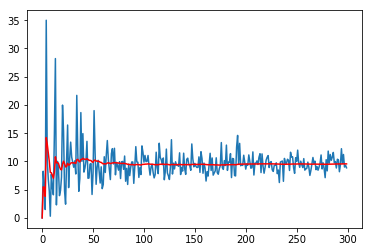

Payoff = 8.87
Payoff Accumulated = 9.57
Time Elapsed = 1.14 seconds


In [2]:
%reset -f
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
start_time = timeit.default_timer()
mu=0.05
sigma=0.3
dt=1
strike=60
price=50
MCtrials=301
tte = 3 # time to expiration
PayOffacList=[]
MCpayOffList=[]
MCpayOffacList=[]
for i in range(1,MCtrials):
    PayOffList=[]
    for j in range(i):
        epsil = np.random.normal(0, 1, tte)
        deltalog=((mu-sigma**2/2)*dt+sigma*np.sqrt(dt)*epsil)
        logp=np.array(np.log(price))
        logp=np.cumsum(np.append(logp, deltalog))
        p=np.exp(logp)
        PayOff=max(p[-1]-strike,0)*np.exp(-mu*tte)
        PayOffList.append(PayOff)
        PayOffacList.append(PayOff)
    MCpayOffList.append(np.mean(PayOffList))
    MCpayOffacList.append(np.mean(PayOffacList))
plt.plot(MCpayOffList)
plt.plot(MCpayOffacList,'r')
plt.show()
end_time = timeit.default_timer() - start_time
print("Payoff = {:.2f}".format(MCpayOffList[-1]))
print("Payoff Accumulated = {:.2f}".format(MCpayOffacList[-1]))
print("Time Elapsed = {:.2f} seconds".format(end_time))